<a href="https://colab.research.google.com/github/soumilbaldota/TensorFlow_Notebooks_101/blob/main/Titanic_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install -q sklearn

In [47]:
%tensorflow_version 2.x
from __future__ import absolute_import,division,print_function,unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf


In [48]:
dftrain=pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dftest=pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")
y_train=dftrain.pop("survived")
y_test=dftest.pop("survived")

In [49]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [50]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


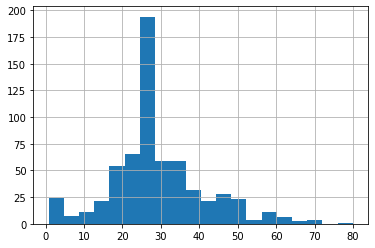

In [51]:
dftrain.age.hist(bins=20)

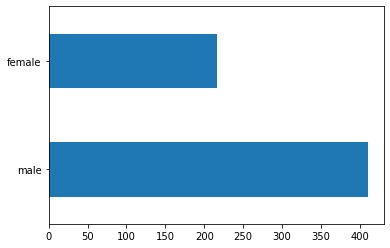

In [52]:
dftrain["sex"].value_counts().plot(kind='barh')

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


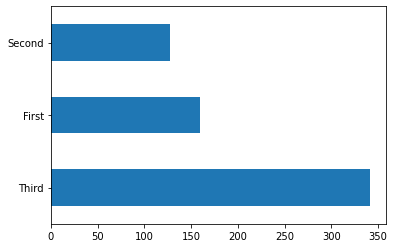

In [53]:

dftrain["class"].value_counts().plot(kind='barh')
dftrain.head()

74 169


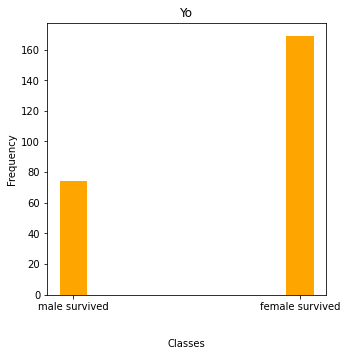

In [54]:
male_survived = 0
female_survived = 0
g = list(y_train)
for i in range(len(g)):
  if g[i] == 1:
    if dftrain['sex'][i] =='male':
      male_survived +=1
    else:
      female_survived+=1
print(male_survived,female_survived)
l=[male_survived,female_survived]
labels = ['male survived','female survived']
fig = plt.figure(figsize=(5,5))
plt.bar(labels, l, color ='orange',  
        width = 0.12) 
  
plt.xlabel("\n\nClasses") 
plt.ylabel("Frequency") 
plt.title("Yo") 
plt.show()

In [55]:
dftest.shape

(264, 9)

In [56]:
CATEGORRICAL_COLUMNS=['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
NUMERICAL_COLUMNS=['age','fare']
feature_columns=[]
for feature_name in CATEGORRICAL_COLUMNS:
  vocabulary=dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

In [57]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
  def input_fun():
    ds=tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle :
      ds=ds.shuffle(1000)
    ds=ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_fun

train_input_fn=make_input_fn(dftrain,y_train)
eval_input_function = make_input_fn(dftest,y_test,num_epochs=1,shuffle=False)

In [58]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)

result=linear_est.evaluate(eval_input_function)
clear_output()
print(result['accuracy'])
print(result)

0.7462121
{'accuracy': 0.7462121, 'accuracy_baseline': 0.625, 'auc': 0.8344352, 'auc_precision_recall': 0.795979, 'average_loss': 0.4745508, 'label/mean': 0.375, 'loss': 0.46696007, 'precision': 0.66, 'prediction/mean': 0.40796265, 'recall': 0.6666667, 'global_step': 200}
